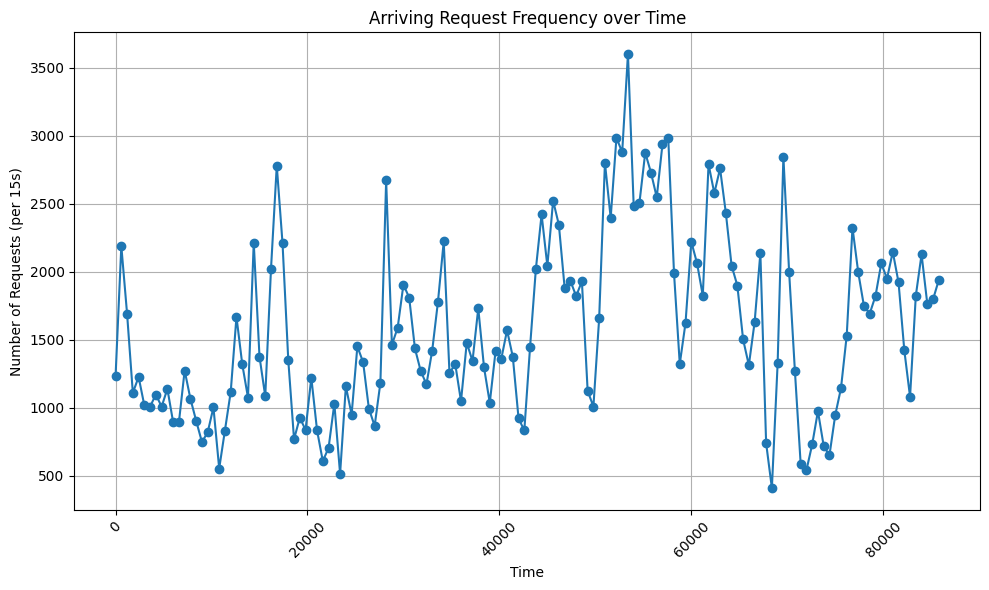

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from a CSV file
csv_file = '../traces/ES_26_d.csv'  # Replace with your actual file path
df = pd.read_csv(csv_file)

# Ensure the column 'arrival_timestamp' exists in the dataset
if 'arrival_timestamp' not in df.columns:
    raise ValueError("The dataset must contain a column named 'arrival_timestamp'.")

# Round the timestamps to the nearest 15-second bucket
df['time_bucket'] = (df['arrival_timestamp'] // 600) * 600

# Count the frequency of requests in each time bucket
request_frequency = df['time_bucket'].value_counts().sort_index()

# Create a time series with gaps for missing 15-second intervals
time_range = np.arange(df['time_bucket'].min(), df['time_bucket'].max() + 600, 600)
request_frequency_full = request_frequency.reindex(time_range, fill_value=0)

# Convert the bucket time back to actual time (in seconds)
# request_frequency_full.index = pd.to_datetime(request_frequency_full.index, unit='s')

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(request_frequency_full.index, request_frequency_full.values, marker='o')
plt.title('Arriving Request Frequency over Time')
plt.xlabel('Time')
plt.ylabel('Number of Requests (per 15s)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv('../traces/week.csv', dtype={'regions': str})

df['sla'] = df.apply(lambda row: 10 if row['workload_type'] == 'prod' else 3600*12, axis=1)
df['model_type'] = df.apply(lambda row: 'B' if row['model_type'] == 'D' else 'D' if row['model_type'] == 'B' else row['model_type'], axis=1)
df['token_size'] = df.apply(lambda row: 1 if row['token_size'] == 0 else row['token_size'], axis=1)

df.to_csv('../traces/week.csv', index=False)

In [4]:
# df['slo'] = 10
df.to_csv('../traces/week.csv', index=False)

In [6]:
df = pd.read_csv('../traces/week.csv', dtype={'regions': str})

df['model_type'] = df.apply(lambda row: row['model_type'] + '-d' if row['workload_type'] == 'dev' else row['model_type'] + '-p', axis=1)
df['workload_type'] = 'prod'
df['sla'] = 10
df.to_csv('../traces/week-dp.csv', index=False)

In [59]:
df = pd.read_csv('../traces/week.csv', dtype={'regions': str})


In [7]:
df[df['workload_type']=='dev'].describe()

,arrival_timestamp,prompt_size,token_size,client_tenant,request_id,batch_id,sla,utility,request_type,application_id,batch_size,slo
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in range(0, 86400*7, 86400):
    df = pd.read_csv('../traces/week-dp.csv', dtype={'regions': str})
    df = df[(df['arrival_timestamp'] >= i) & (df['arrival_timestamp'] < i+86400)]
    # df['regions'] = df.apply(lambda row: str(row['regions']).zfill(3), axis=1)
    df['arrival_timestamp'] = df.apply(lambda row: row['arrival_timestamp'] - i, axis=1)
    df.to_csv(f'../traces/day-{i//86400}-dp.csv', index=False)

In [ ]:
df = pd.read_csv('../traces/week.csv')
df = df[df['token_size'] > 0]
df['sla'] = df.apply(lambda row: 12*(row['sla']) if row['sla'] == 3600 else row, axis=1)
# df.to_csv(f'../traces/week.csv', index=False)

In [48]:
df = pd.read_csv('../traces/day-1.csv', dtype={'regions': str})
df['prompt_size'] = df.apply(lambda row: max(1, row['prompt_size'] * 2) if row['model_type'] == 'A' else row['prompt_size'], axis=1)
# df[(df['model_type'] == 'A') & (df['workload_type'] == 'dev') & (df['total_tokens'] < 4096)].describe()
df.to_csv(f'../traces/day-1.csv', index=False)

In [47]:
df = pd.read_csv('../traces/day-1.csv', dtype={'regions': str})
df = df[(df['model_type'] == 'A') & (df['workload_type'] == 'dev')]
df['token_size'].quantile(0.99), df['prompt_size'].quantile(0.99)

(np.float64(567.0), np.float64(1840.0))

In [50]:
from sortedcontainers import SortedList
sl = SortedList('accbde')
for i in sl:
    print(i)
sl.remove('c')
sl

a
b
c
c
d
e


SortedList(['a', 'b', 'c', 'd', 'e'])